# 데이터 불러오기

In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
plt.rc('font', family=font_name)

In [ ]:
from google.colab import drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

#import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

sns.set_palette("bright")
sns.set_style('darkgrid')

In [ ]:
demo = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_01_DEMO.csv")
pdde = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_02_PDDE.csv")
cop = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_03_COP_U.csv")
pd_clac = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_04_PD_CLAC.csv")
br = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_05_BR.csv")
lpay = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_06_LPAY.csv")
# 외부 변수
holiday = pd.read_csv("/content/mnt/MyDrive/LDA/data/holiday.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 도구 함수

In [ ]:
def get_season(x):
  x = int(x)
  if 3 <= x < 6:
    return 0
  elif 6 <= x < 9:
    return 1
  elif 9 <= x <12:
    return 2
  else:
    return 3

def make_time_feats(df):
  """
  시간 변수를 생성
  """
  df['de_dt'] = df['de_dt'].astype("str")
  df["de_dt"] = pd.to_datetime(df['de_dt'])
  df['de_dow'] = df['de_dt'].dt.dayofweek
  df['de_day'] = df['de_dt'].dt.day
  df['de_month'] = df['de_dt'].dt.month.apply(lambda x : f"{x:0>2}") # zero-pad
  df["de_day"] = df['de_dt'].dt.day.apply(lambda x : f"{x:0>2}") # zero-pad
  df["de_hr"] = df["de_hr"].apply(lambda x : f"{x:0>2}") # zero-pad
  df['de_hday'] = df['de_dow'].apply(lambda x : 1 if x == 5 or x == 6 else 0)
  df['de_season'] = df['de_month'].apply(lambda x : get_season(x))

  hday = set(holiday['날짜'].unique())
  df.loc[df.de_dt.isin(hday), "de_hday"] = 1

In [ ]:
def pie_chart(data, cat, figsize):
  """
  파이 차트를 그립니다.
  args
    - data : pd.DataFrame
    - cat : 카테고리 이름
    - figsize : figsize
  """
  fig, axs = plt.subplots(figsize = figsize)
  pie_idx, pie_value = data[cat].value_counts().index, data[cat].value_counts().values
  axs.pie(pie_value, labels = pie_idx, autopct = "%.1f")
  plt.title(f"{cat}")
  plt.show()

In [ ]:
make_time_feats(pdde)
make_time_feats(cop)
make_time_feats(lpay)

In [ ]:
demo['ma_fem_dv_ages'] = demo['ma_fem_dv'] + demo['ages']

#5. *LPAY*

## A. 데이터 확인

In [ ]:
lpay.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,de_dow,de_day,de_month,de_hday,de_season
0,M629656521,210803210311226,A03,1,2021-08-03,21,10900,1,03,08,0,1
1,M216016456,210803130167542,L01,2,2021-08-03,13,6860,1,03,08,0,1
2,M205142844,210803140275112,A02,1,2021-08-03,14,9000,1,03,08,0,1
3,M737010483,210803040637594,A06,2,2021-08-03,04,36740,1,03,08,0,1
4,M707775545,210803140675502,A06,2,2021-08-03,14,138500,1,03,08,0,1


In [ ]:
lpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   cust       353184 non-null  object        
 1   rct_no     353184 non-null  int64         
 2   cop_c      353184 non-null  object        
 3   chnl_dv    353184 non-null  int64         
 4   de_dt      353184 non-null  datetime64[ns]
 5   de_hr      353184 non-null  object        
 6   buy_am     353184 non-null  int64         
 7   de_dow     353184 non-null  int64         
 8   de_day     353184 non-null  object        
 9   de_month   353184 non-null  object        
 10  de_hday    353184 non-null  int64         
 11  de_season  353184 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 32.3+ MB


In [ ]:
lpay.nunique()

cust           8906
rct_no       353184
cop_c            14
chnl_dv           2
de_dt           365
de_hr            24
buy_am        37755
de_dow            7
de_day           31
de_month         12
de_hday           2
de_season         4
dtype: int64

In [ ]:
lpay.describe()

,rct_no,chnl_dv,buy_am,de_dow,de_hday,de_season
count,3.531840e+05,353184.000000,3.531840e+05,353184.000000,353184.000000,353184.000000
mean,2.106709e+14,1.575264,6.081179e+04,2.991302,0.317783,1.444978
std,3.376498e+11,0.494304,3.417790e+05,2.010784,0.465615,1.108691
min,2.101010e+14,1.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,2.104082e+14,1.000000,7.450000e+03,1.000000,0.000000,0.000000
50%,2.106302e+14,2.000000,2.000000e+04,3.000000,0.000000,1.000000
75%,2.109301e+14,2.000000,4.859050e+04,5.000000,1.000000,2.000000
max,2.112312e+14,2.000000,3.000000e+07,6.000000,1.000000,3.000000


### 중복 확인

In [ ]:
lpay.loc[lpay.duplicated()]

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,de_dow,de_day,de_month,de_hday,de_season


### 결측치 여부

In [ ]:
lpay.isnull().sum()

cust         0
rct_no       0
cop_c        0
chnl_dv      0
de_dt        0
de_hr        0
buy_am       0
de_dow       0
de_day       0
de_month     0
de_hday      0
de_season    0
dtype: int64

## B. 유통/제휴사 기준

### 1) 유통/제휴사별 결제 금액 분포

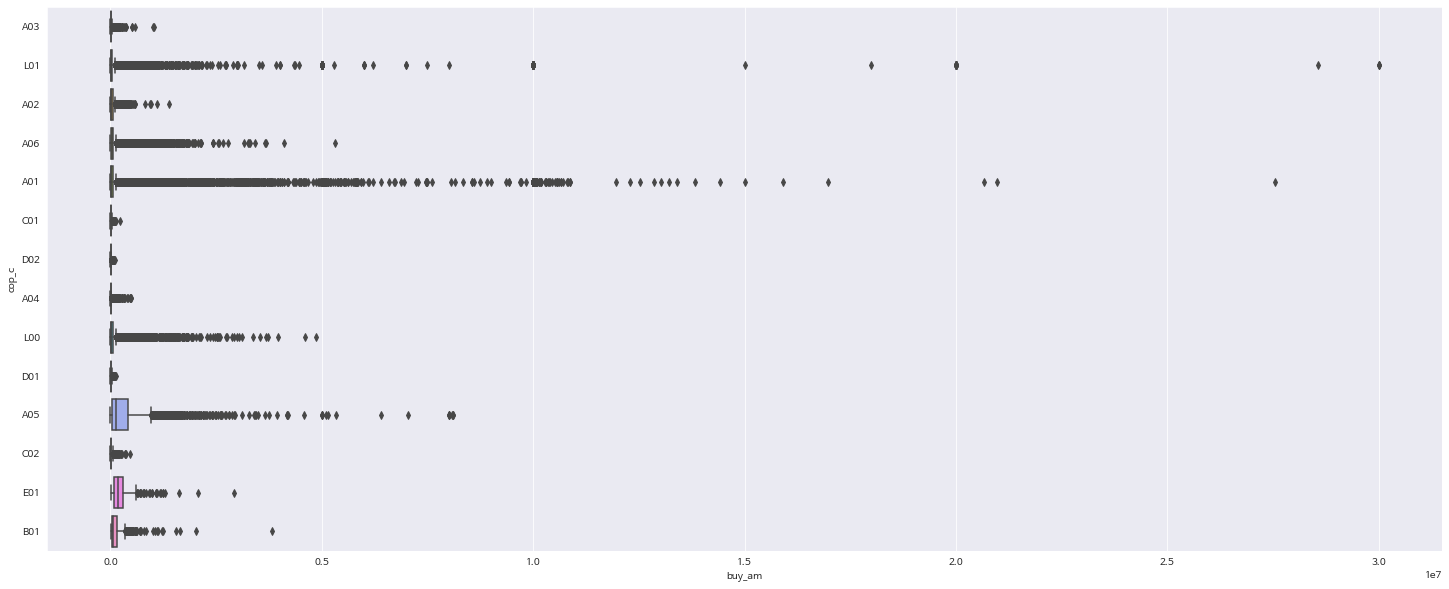

In [ ]:
fig, axs = plt.subplots(figsize = (25, 10))
sns.boxplot(data = lpay, y = "cop_c", x = "buy_am")

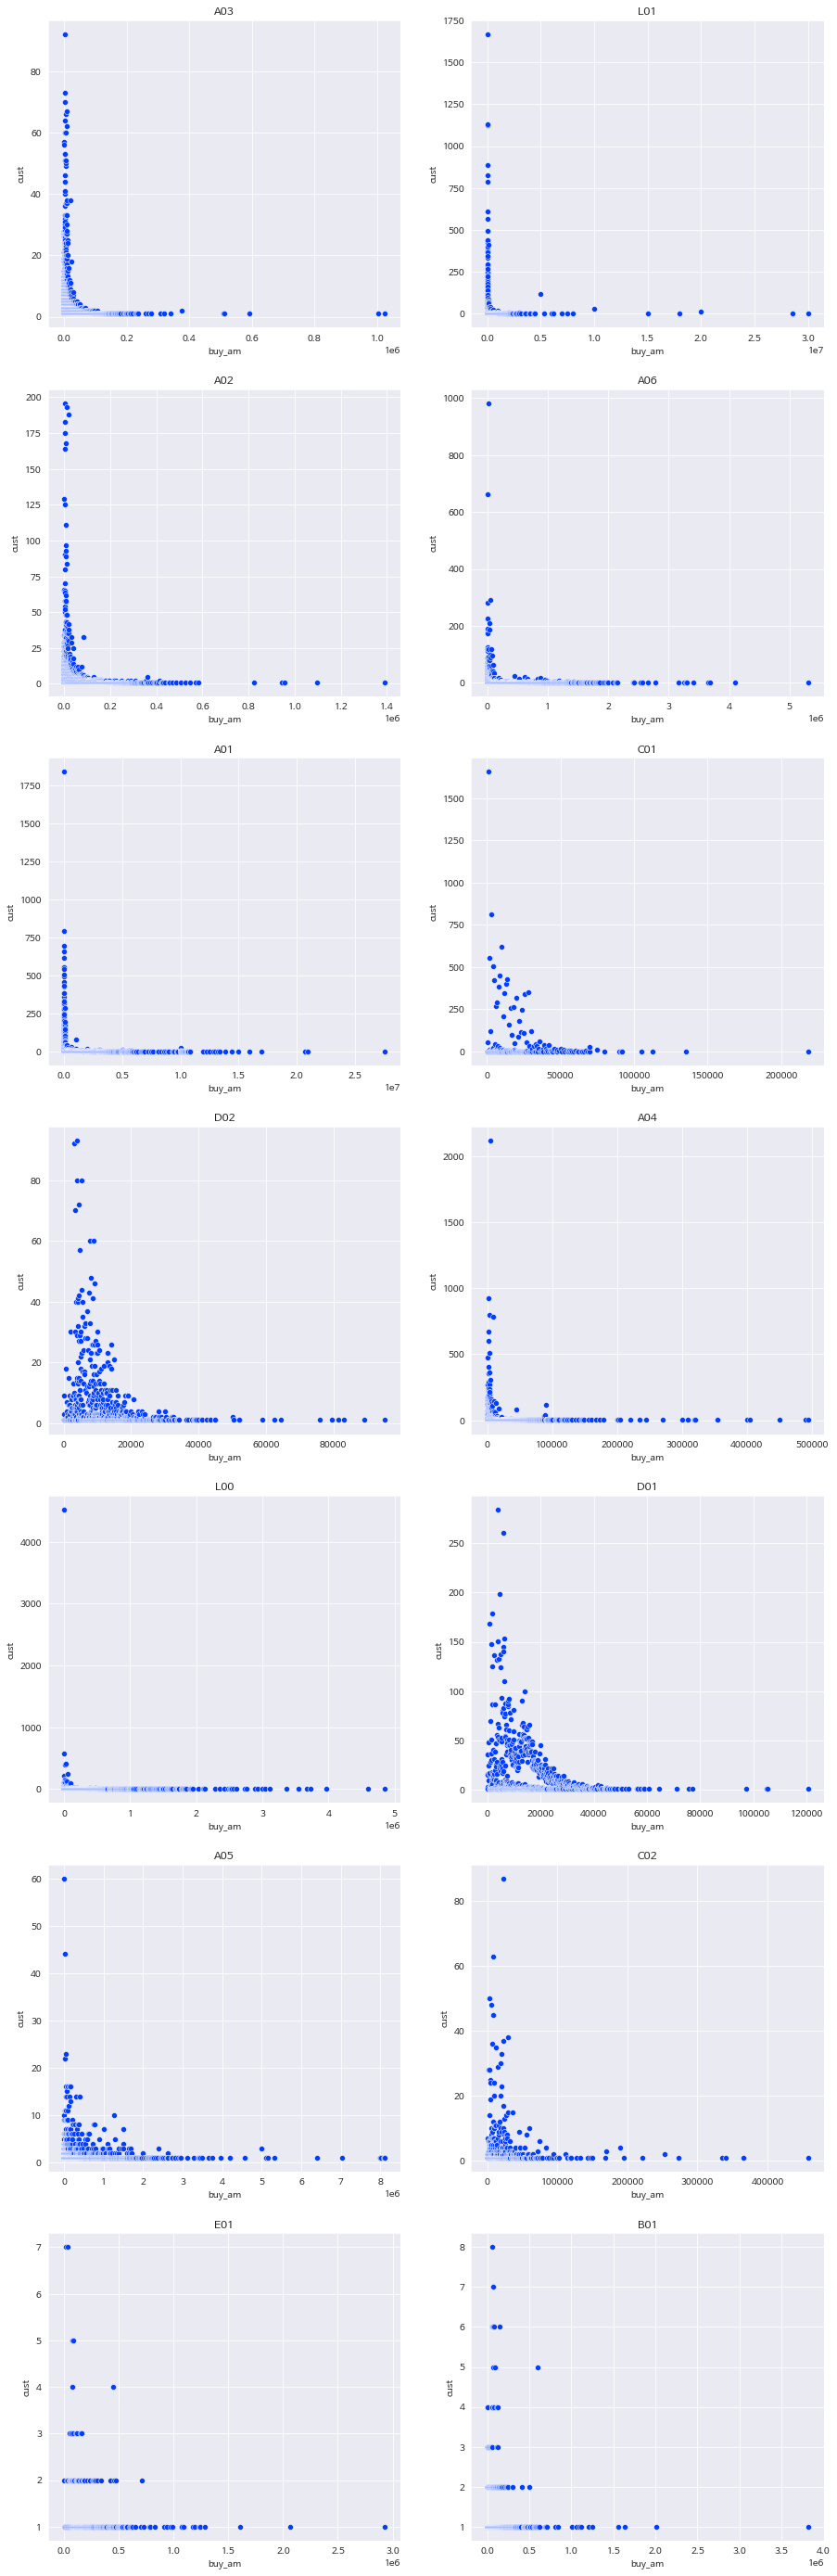

In [ ]:
fig, axs = plt.subplots(7, 2, figsize = (15, 50))
temp = lpay.groupby(["cop_c", "buy_am"])['cust'].count().reset_index()
name = lpay.cop_c.unique()

for row in range(7):
  for col in range(2):
    ax = axs[row][col]
    name_temp = name[row * 2 + col]

    data = temp.loc[temp.cop_c == name_temp]
    sns.scatterplot(data = data, x = "buy_am", y = "cust", ax = ax)
    ax.set_title(f"{name_temp}")

### 2) 유통/제휴사별 이용 횟수
- 온/오프라인

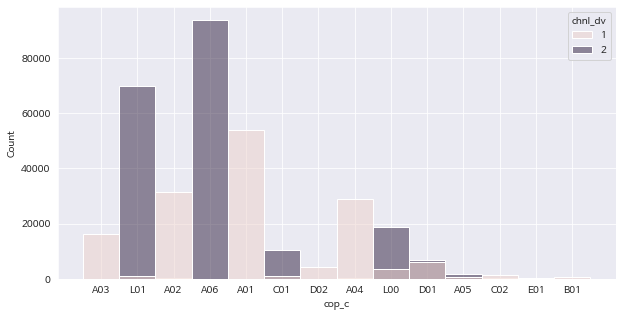

In [ ]:
fig, axs = plt.subplots(figsize = (10, 5))
sns.histplot(data = lpay, x = "cop_c", hue = "chnl_dv")

### 3) 유통/제휴사별 결제 금액
- 온/오프라인

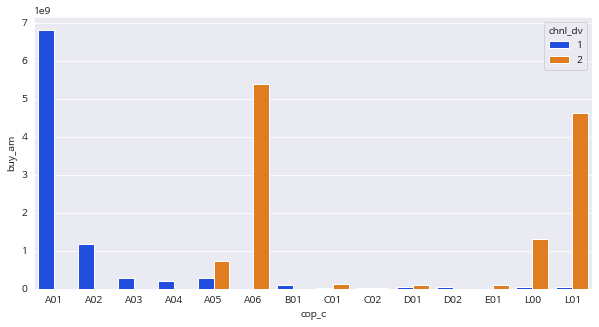

In [ ]:
fig, axs = plt.subplots(figsize = (10, 5))
temp=lpay.groupby(['cop_c','chnl_dv']).buy_am.sum().reset_index()
sns.barplot(data = temp, x = "cop_c", y='buy_am',hue = "chnl_dv")

## C. 고객 인구 특성 기준

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,de_dow,de_day,de_month,de_hday,de_season,ma_fem_dv,ages,zon_hlv,ma_fem_dv_ages
0,M629656521,210803210311226,A03,1,2021-08-03,21,10900,1,03,08,0,1,남성,40대,Z04,남성40대
1,M216016456,210803130167542,L01,2,2021-08-03,13,6860,1,03,08,0,1,여성,40대,Z04,여성40대
2,M205142844,210803140275112,A02,1,2021-08-03,14,9000,1,03,08,0,1,여성,60대,Z17,여성60대
3,M737010483,210803040637594,A06,2,2021-08-03,04,36740,1,03,08,0,1,남성,40대,Z16,남성40대
4,M707775545,210803140675502,A06,2,2021-08-03,14,138500,1,03,08,0,1,남성,30대,Z11,남성30대


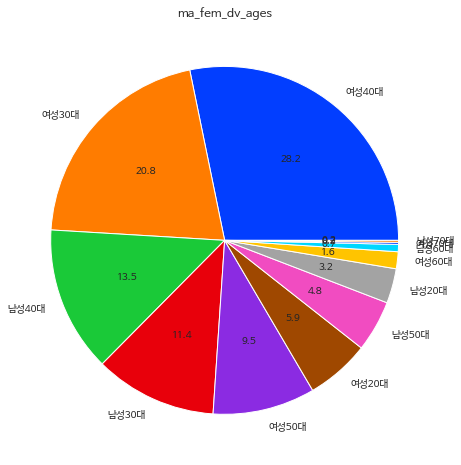

In [ ]:
lpay_demo=pd.merge(lpay,demo,how='left',on='cust')
display(lpay_demo.head())

temp = demo.loc[demo.cust.isin(lpay.cust.unique())]
pie_chart(temp, "ma_fem_dv_ages",(8, 8))

### 1) 결제 횟수


#### 온/오프라인별 결제 수

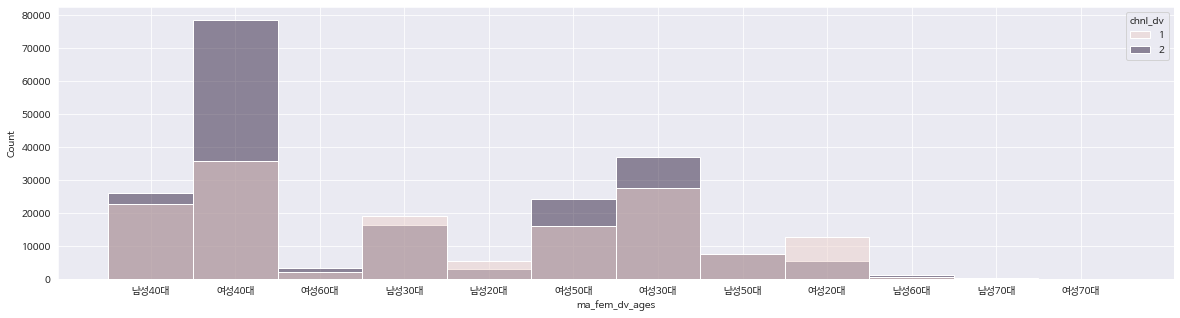

In [ ]:
fig, axs = plt.subplots(figsize=(20, 5))
sns.histplot(data = lpay_demo, x = "ma_fem_dv_ages", hue = "chnl_dv")

#### 유통/제휴사별 결제 수

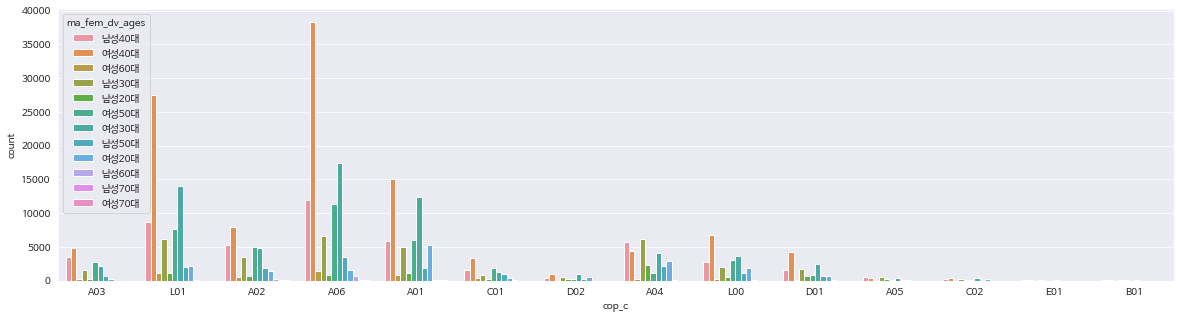

In [ ]:
fig, axs = plt.subplots(figsize=(20, 5))
sns.countplot(data = lpay_demo, x = "cop_c", hue = "ma_fem_dv_ages")

#### 날짜별 결제 수

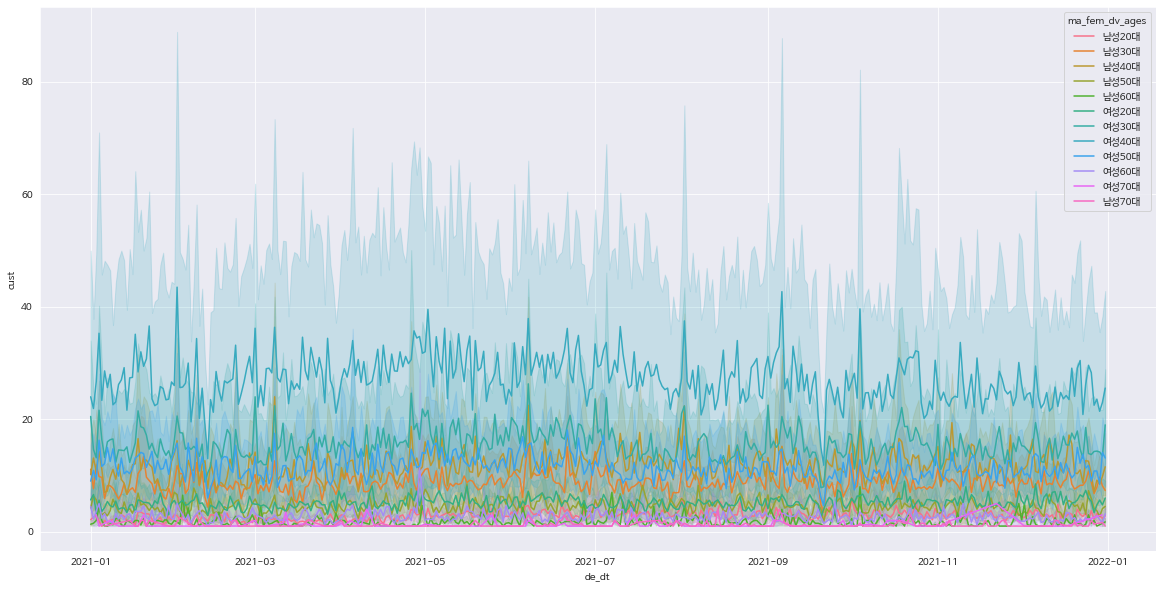

In [ ]:
fig, axs = plt.subplots(figsize = (20, 10))
temp = lpay_demo.groupby(["de_dt", "ma_fem_dv_ages","cop_c"])['cust'].count().reset_index()
sns.lineplot(data = temp, x = "de_dt", y = "cust", ax = axs, hue = 'ma_fem_dv_ages')

###2) 결제 금액

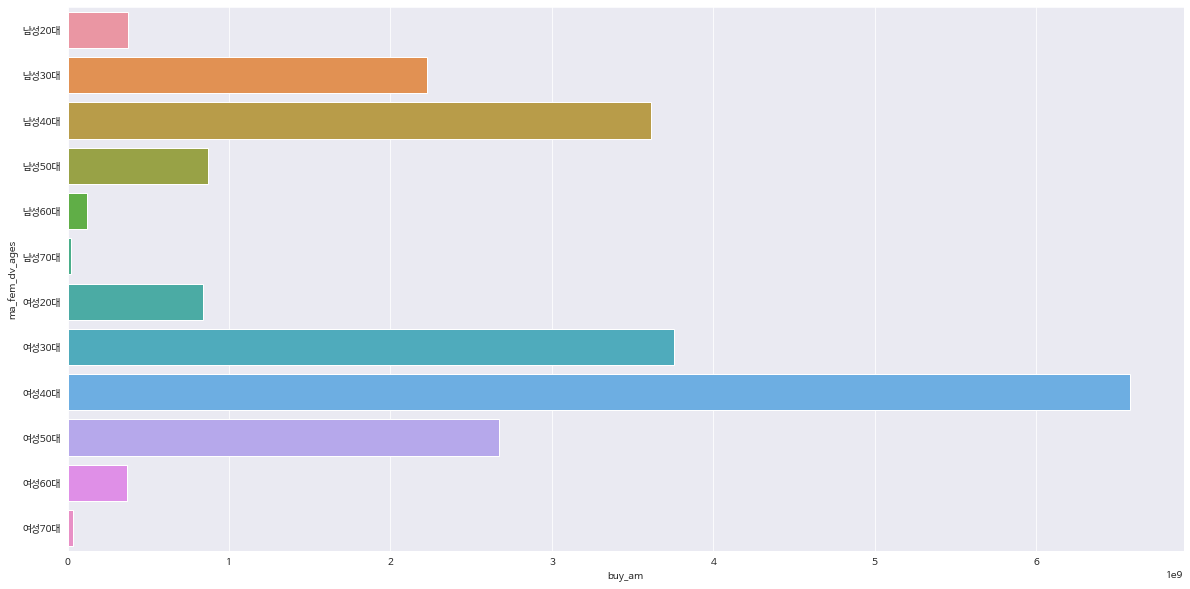

In [ ]:
fig, axs = plt.subplots(figsize = (20, 10))
temp=lpay_demo.groupby(['ma_fem_dv_ages']).buy_am.sum().reset_index()
sns.barplot(data = temp, x = "buy_am", y = "ma_fem_dv_ages")

#### 유통/제휴사별 결제 금액 비율
- 금액 합계

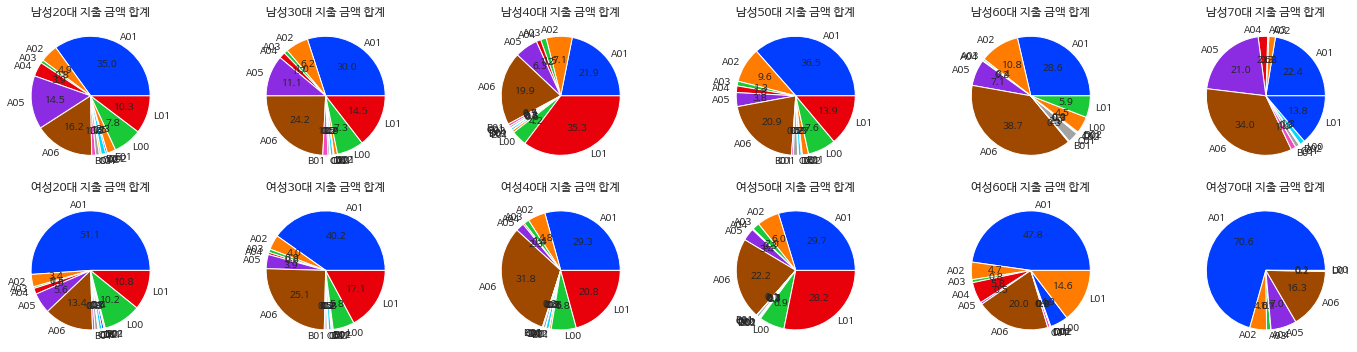

In [ ]:
temp = lpay_demo.groupby(["ma_fem_dv_ages", "cop_c"])['buy_am'].agg(["sum"]).reset_index()
name = temp.ma_fem_dv_ages.unique()

fig, axs = plt.subplots(2, 6, figsize = (20, 5))
for row in range(2):
  for col in range(6):
    ax = axs[row][col]
    temp_name = name[row*6 + col]
    temp2 = temp.loc[temp.ma_fem_dv_ages == temp_name]

    pie_idx, pie_value = temp2["cop_c"], temp2['sum']
    ax.pie(pie_value, labels = pie_idx, autopct = "%.1f")
    ax.set_title(f"{temp_name} 지출 금액 합계")

fig.tight_layout()

#### 유통/제휴사별 결제 금액 평균 비율
- 금액 평균

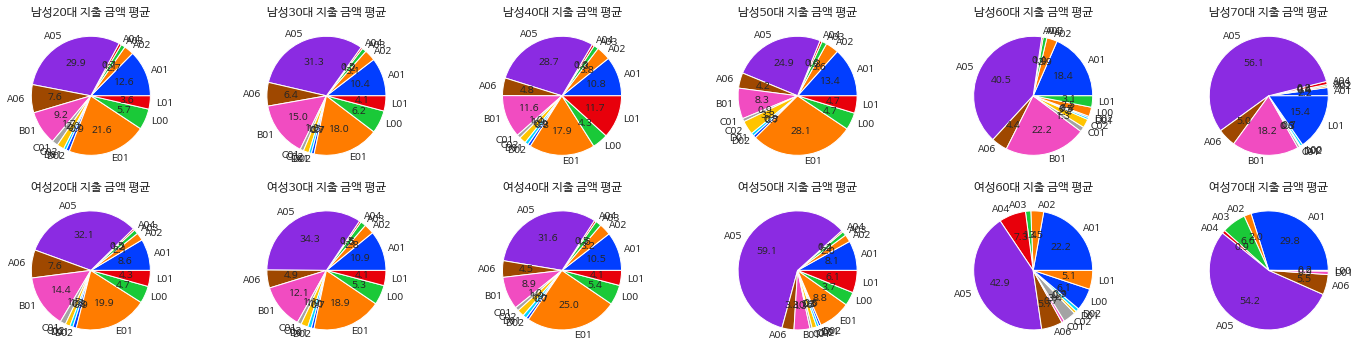

In [ ]:
temp = lpay_demo.groupby(["ma_fem_dv_ages", "cop_c"])['buy_am'].agg(["mean"]).reset_index()
name = temp.ma_fem_dv_ages.unique()

fig, axs = plt.subplots(2, 6, figsize = (20, 5))
for row in range(2):
  for col in range(6):
    ax = axs[row][col]
    temp_name = name[row*6 + col]
    temp2 = temp.loc[temp.ma_fem_dv_ages == temp_name]

    pie_idx, pie_value = temp2["cop_c"], temp2['mean']
    ax.pie(pie_value, labels = pie_idx, autopct = "%.1f")
    ax.set_title(f"{temp_name} 지출 금액 평균")

fig.tight_layout()

#### 전체 결제 1회 금액 크기
- 전체 금액

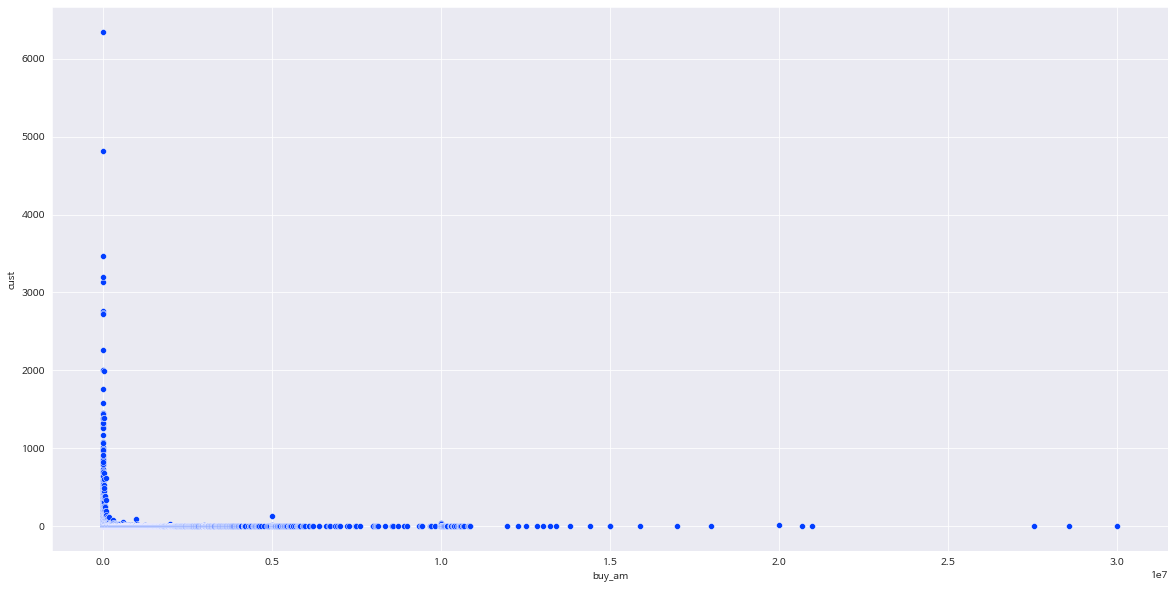

In [ ]:
fig, axs = plt.subplots(figsize = (20, 10))
temp = lpay.groupby('buy_am').cust.count().sort_index().reset_index()
sns.scatterplot(data = temp, x = "buy_am", y = "cust", ax = axs)

#### 하위 1% 결제 금액 크기
- 100원 결제 고객 수 상당
- `엘페이 100원 결제 마케팅` 존재 확인

하위 1% 금액 1479.08
100원 결제 고객 수 : 6344


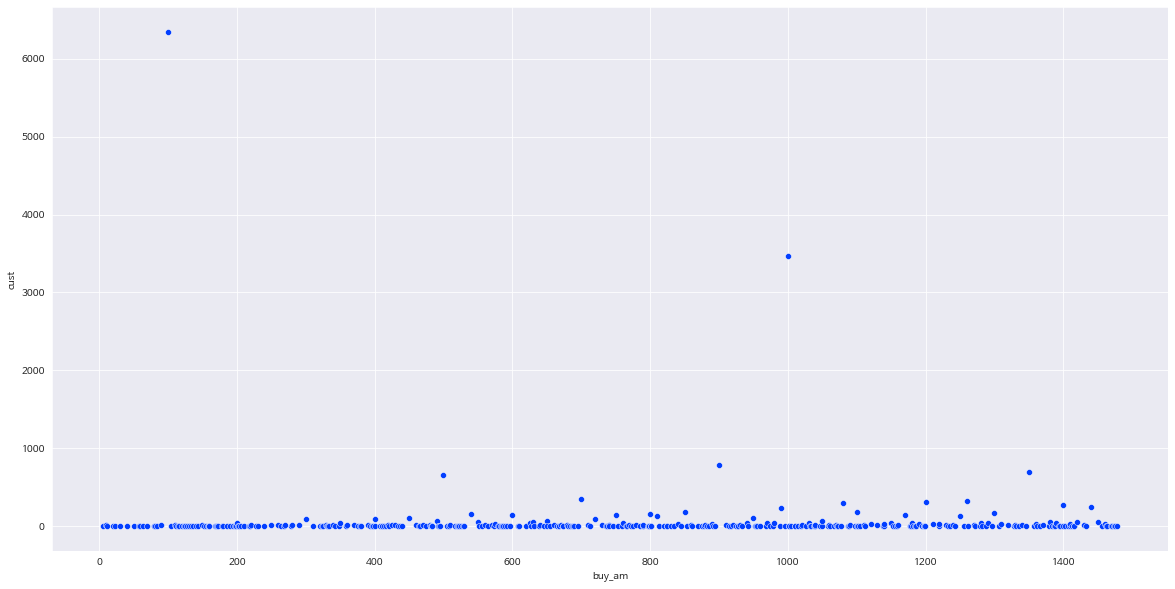

In [ ]:
under_1=np.quantile(temp['buy_am'],0.01)
print(f'하위 1% 금액 {under_1}')
print(f'100원 결제 고객 수 : {temp.loc[temp.buy_am==100].cust.values[0]}')
temp2 = temp.loc[temp.buy_am <= under_1]

fig, axs = plt.subplots(figsize = (20, 10))
sns.scatterplot(data = temp2, x = "buy_am", y = "cust", ax = axs)

## D. 시간 기준

### 1) 첫 사용 시기

,de_dt,cnt
0,01-01,611
1,01-02,472
3,01-03,403
2,01-04,449
4,01-05,258


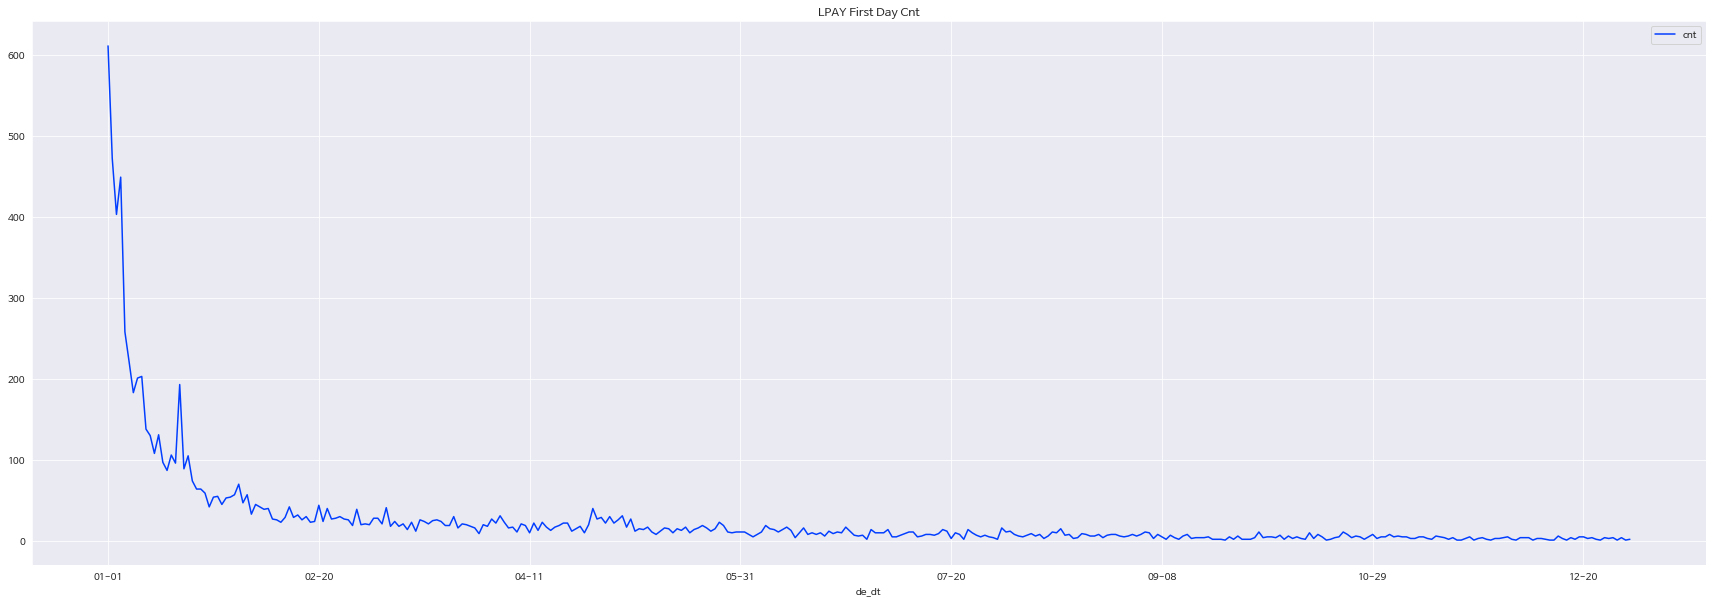

In [ ]:
lpay_first = lpay.groupby(["cust"]).de_dt.min().reset_index()
first_day_cnt = lpay_first['de_dt'].value_counts().reset_index()
first_day_cnt = first_day_cnt.sort_values(by = "index")
first_day_cnt.rename(columns = {"index" : "de_dt", "de_dt" : "cnt"}, inplace = True)
first_day_cnt['de_dt'] = first_day_cnt['de_dt'].dt.strftime("%m-%d")
display(first_day_cnt.head())

fig, axs = plt.subplots(figsize = (30, 10))
axs.tick_params(axis='x', labelrotation=90)
axs.set_title("LPAY First Day Cnt")
first_day_cnt.plot(x = "de_dt", y = "cnt", ax = axs)

### 2) 사용 주기

#### 전체 고객 사용 주기

In [ ]:
def get_period(x):
  temp = x[:]
  p = []
  for idx, t in enumerate(temp):
    if idx == 0:
      continue
    p.append((temp[idx] - temp[idx - 1]).days)
  
  p_mean = sum(p) / len(p)

  return p_mean

한 번 이상 엘페이를 이용한 유저 수 : 8906
두 번 이상 엘페이를 이용한 유저 수 : 7937
한 번만 엘페이를 이용한 유저 수 : 969


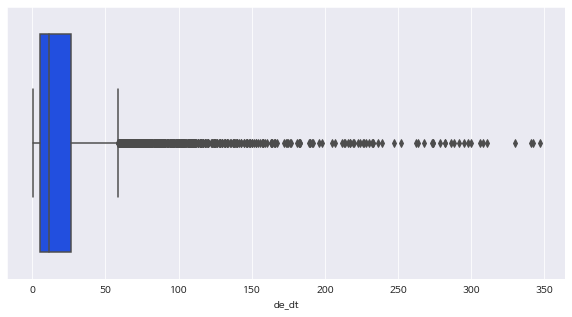

In [ ]:
lpay_demo = lpay_demo.sort_values(by = ["cust", "de_dt"])
temp = lpay_demo.groupby(["cust"])['de_dt'].apply(list).reset_index()
temp2 = len(temp)
print(f"한 번 이상 엘페이를 이용한 유저 수 : {len(temp)}")
# 한번 이상 구매한 고객만으로 확인
temp.drop(temp.loc[temp.de_dt.apply(len) == 1].index, inplace = True)
temp['de_dt'] = temp['de_dt'].apply(lambda x : get_period(x))
temp = temp.loc[temp.de_dt > 0]
print(f"두 번 이상 엘페이를 이용한 유저 수 : {len(temp)}")
print(f"한 번만 엘페이를 이용한 유저 수 : {temp2 - len(temp)}")

fig, axs = plt.subplots(figsize = (10, 5))
sns.boxplot(data = temp, x = "de_dt", ax= axs)

#### 고객 특성별 사용 주기

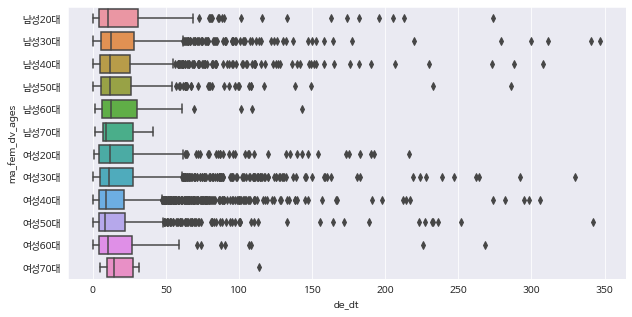

In [ ]:
temp = temp.merge(demo, how = 'left')
temp2 = temp.groupby(["ma_fem_dv_ages", "de_dt"]).size().reset_index()
fig, axs = plt.subplots(figsize = (10, 5))
sns.boxplot(data = temp2, x = "de_dt", y = "ma_fem_dv_ages", ax= axs)

## D. 엘페이 외 거래

###1) 유통사/제휴사 거래

In [ ]:
interaction=pd.concat([pdde,lpay,cop],axis=0,join='outer')

lpay_user=set(lpay.cust.unique().tolist())
interaction_user=set(interaction.cust.unique().tolist())

print(f'엘페이 이용 고객 수 : {len(lpay_user)}')
print(f'엘페이 이용하지 않는 고객 수 : {len(interaction_user.difference(lpay_user))}')

엘페이 이용 고객 수 : 8906
엘페이 이용하지 않는 고객 수 : 20968


#### 엘페이 이용 여부와 거래 비율
- LPAY 고객의 거래 횟수가 더 많은 것 확인

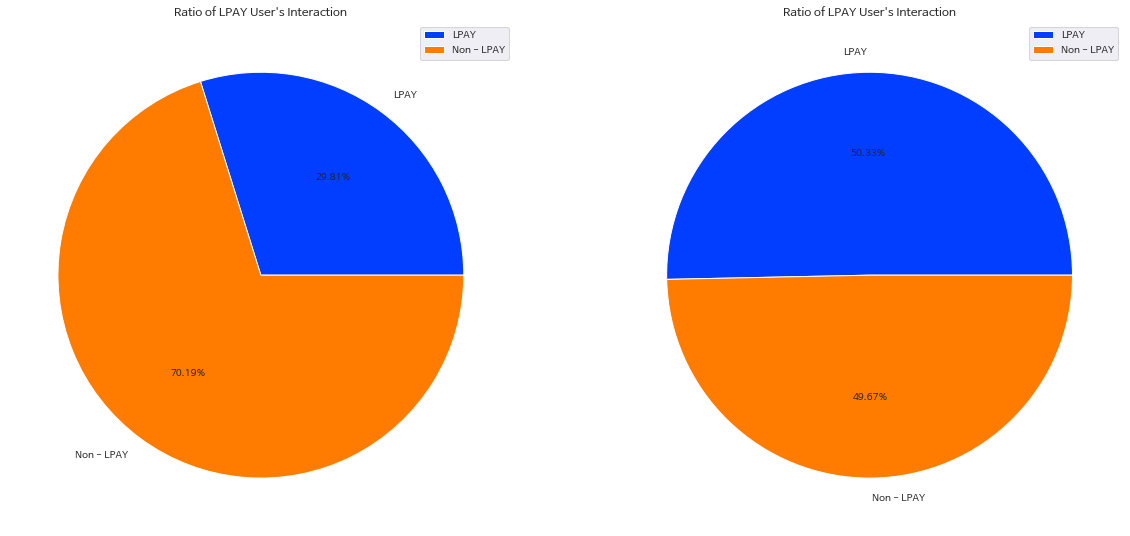

In [ ]:
cnt_1,cnt_2 = [len(lpay_user), len(interaction_user.difference(lpay_user))], [len(interaction.loc[interaction.cust.isin(lpay_user)]), len(interaction) - len(interaction.loc[interaction.cust.isin(lpay_user)])]
labels = ["LPAY", "Non - LPAY"]
fig, axs = plt.subplots(1,2,figsize = (20, 20))

ax=axs[0]
ax.set_title("Ratio of LPAY User's Interaction")
ax.pie(x = cnt_1, labels = labels, autopct = '%.2f%%')
ax.legend()

ax=axs[1]
ax.set_title("Ratio of LPAY User's Interaction")
ax.pie(x = cnt_2, labels = labels, autopct = '%.2f%%')
ax.legend()

#### 엘페이 이용 여부와 거래 패턴

In [ ]:
lpay_interaction = interaction.loc[interaction.cust.isin(lpay_user)]
non_lpay_interaction = interaction.loc[~interaction.cust.isin(lpay_user)]

- ON/OFF 거래


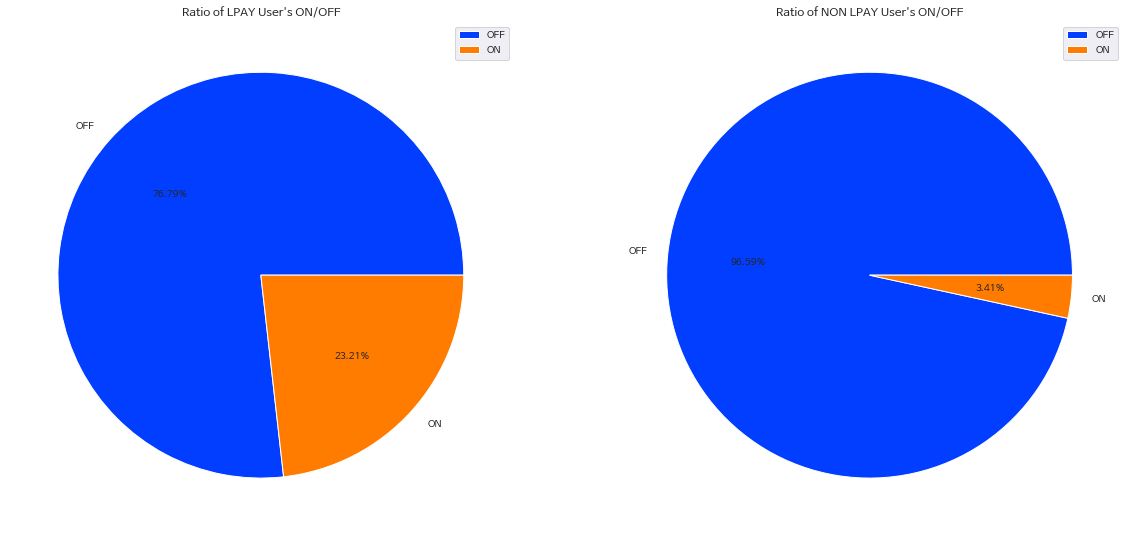

In [ ]:
cnt_1,cnt_2 = lpay_interaction.chnl_dv.value_counts().tolist(), non_lpay_interaction.chnl_dv.value_counts().tolist()
labels= ["OFF", "ON"]
fig, axs = plt.subplots(1,2,figsize = (20, 20))

ax=axs[0]
ax.set_title("Ratio of LPAY User's ON/OFF")
ax.pie(x = cnt_1, labels = labels, autopct = '%.2f%%')
ax.legend()

ax=axs[1]
ax.set_title("Ratio of NON LPAY User's ON/OFF")
ax.pie(x = cnt_2, labels = labels, autopct = '%.2f%%')
ax.legend()

- 유통/제휴사 거래

In [ ]:
temp_lpay=lpay_interaction['cop_c'].value_counts().reset_index()
temp_lpay['lpay']=1
temp_non=non_lpay_interaction['cop_c'].value_counts().reset_index()
temp_non['lpay']=0

temp=pd.concat([temp_non,temp_lpay],axis=0,join='outer')
temp.rename(columns={'cop_c':'cnt','index':'cop_c'},inplace=True)

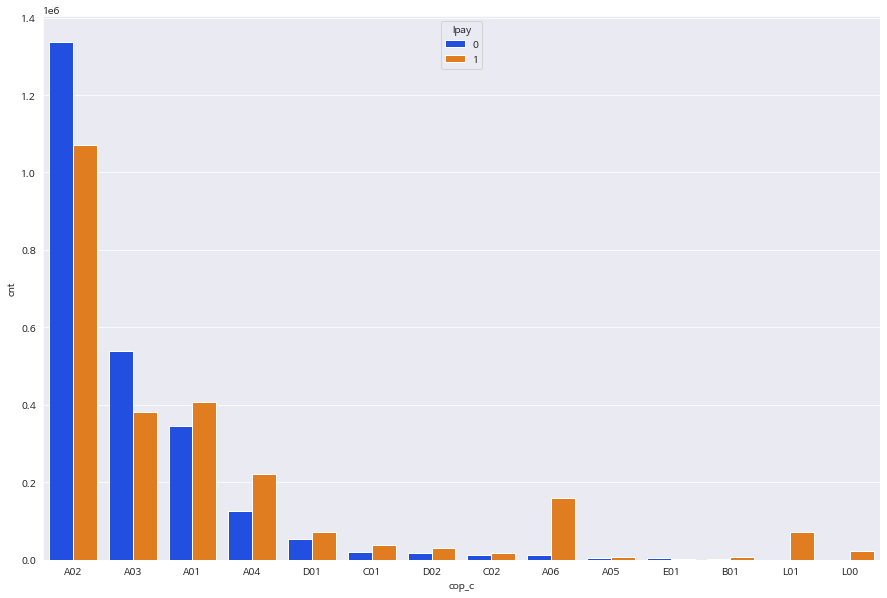

In [ ]:
fig, axs = plt.subplots(figsize = (15, 10))
sns.barplot(data = temp, x = "cop_c",y='cnt',hue='lpay')

## E. 기타

### 1) 100원 마케팅

In [ ]:
print(f'엘페이 전체 고객 수 : {lpay_demo.cust.nunique()}')
print(f'100원 마케팅 참여 고객 수(추정) : {lpay_demo.loc[lpay_demo.buy_am==100].cust.nunique()}')
print(f'100원 마케팅 미참여 고객 수(추정) : {lpay_demo.cust.nunique()-lpay_demo.loc[lpay_demo.buy_am==100].cust.nunique()}')

엘페이 전체 고객 수 : 8906
100원 마케팅 참여 고객 수(추정) : 1270
100원 마케팅 미참여 고객 수(추정) : 7636


#### 예시 : `삼성전자세일페스타`
- 롯데하이마트 주관 
- 100원 딜 행사 기간 : `2021.01.18 ~ 2021.01.24`
- 행사 상품 : 무선 블루투스 이어폰, 건타입 청소기, 모니터, 전기레인지, 공기청정기, 김치냉장고 등
- 엘포인트 `100 포인트 결제`로 참여
- https://www.fnnews.com/news/202101181310264413

In [ ]:
lpay_100=lpay_demo.loc[lpay_demo.buy_am==100]
lpay_100.groupby(['de_dt']).rct_no.count().reset_index().iloc[10:25,:]

,de_dt,rct_no
10,2021-01-13,5
11,2021-01-14,3
12,2021-01-15,5
13,2021-01-16,2
14,2021-01-17,5
15,2021-01-18,302
16,2021-01-19,258
17,2021-01-20,294
18,2021-01-21,245
19,2021-01-22,231


#### 시계열 확인

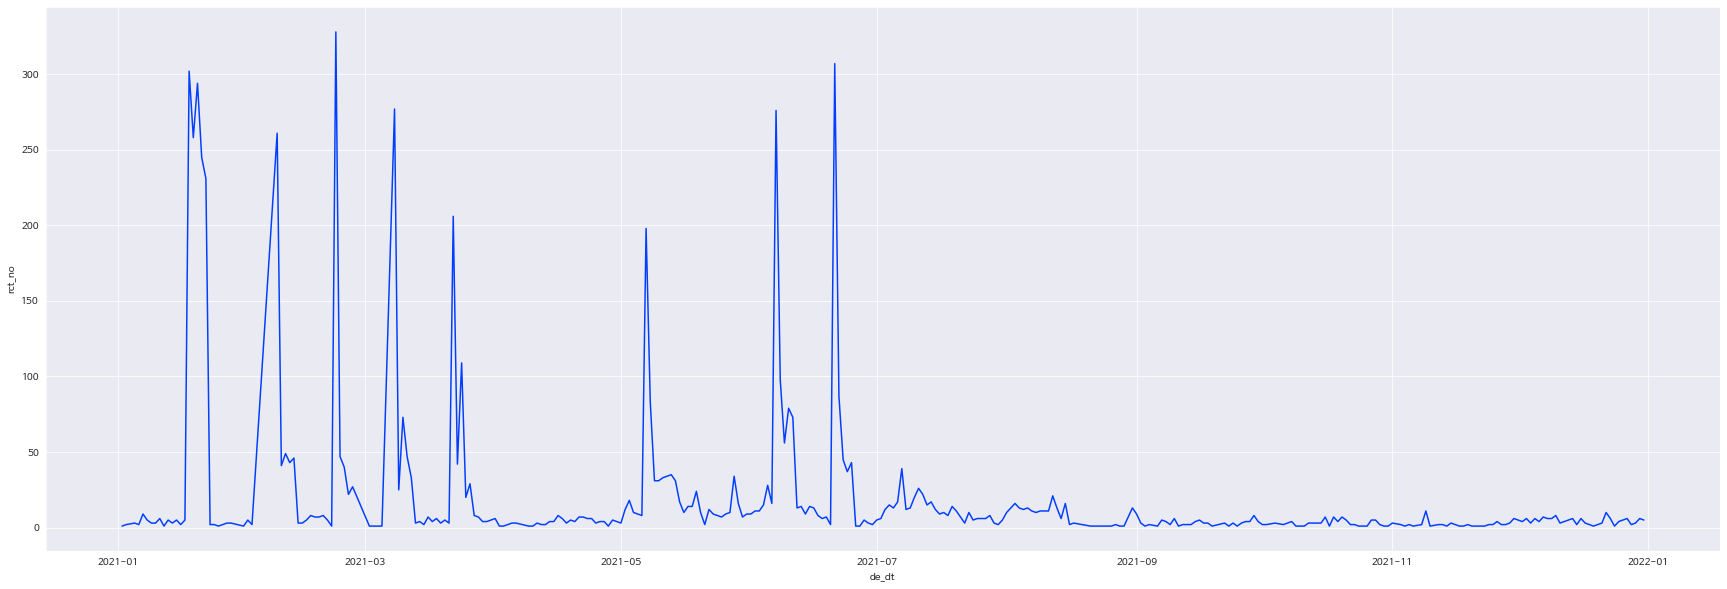

In [ ]:
fig, axs = plt.subplots(figsize = (30, 10))
sns.lineplot(data =lpay_100.groupby(['de_dt']).rct_no.count().reset_index(), x ='de_dt', y='rct_no')

- 다른 엘페이 거래와 비교

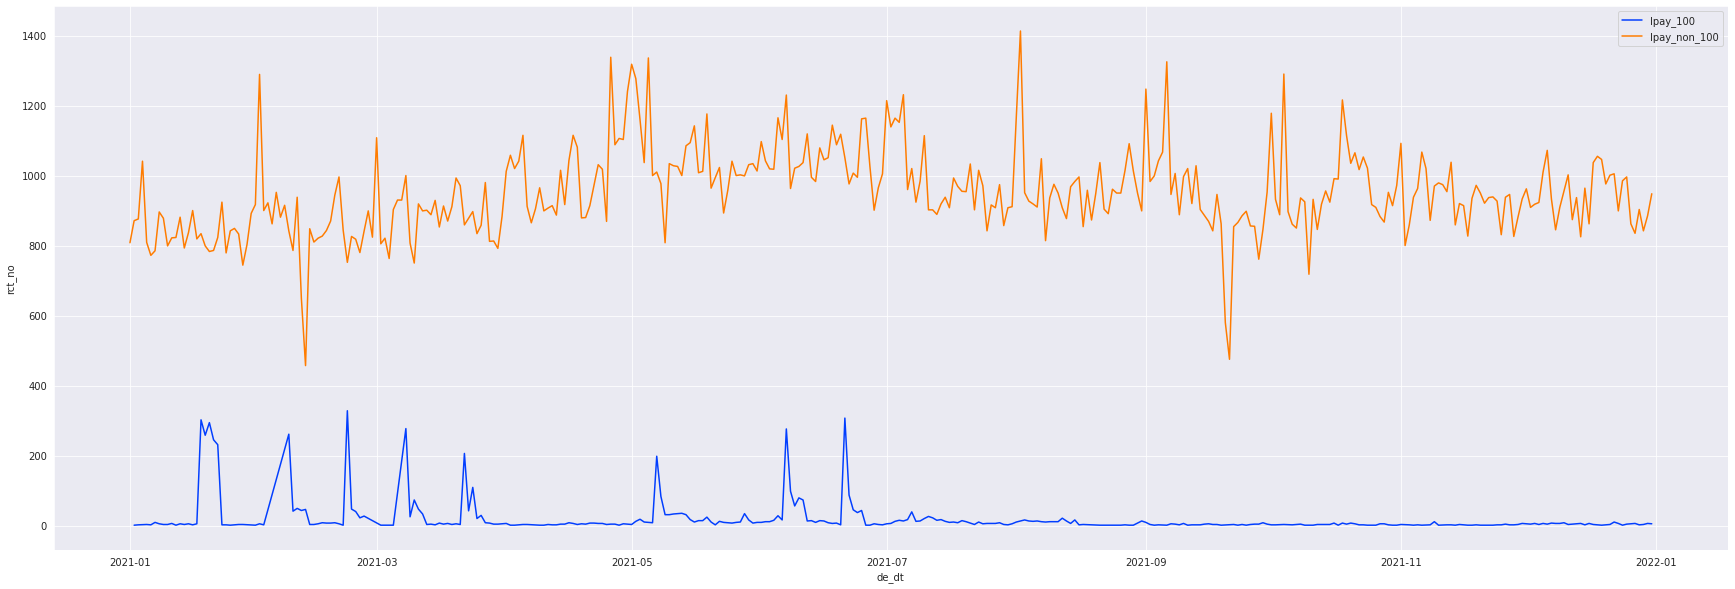

In [ ]:
lpay_non_100=lpay_demo.loc[lpay_demo.buy_am!=100]
temp1=lpay_100.groupby(['de_dt']).rct_no.count().reset_index()
temp4=lpay_non_100.groupby(['de_dt']).rct_no.count().reset_index()

fig, axs = plt.subplots(figsize = (30, 10))
sns.lineplot(data = temp1, x ='de_dt', y='rct_no', label='lpay_100')
sns.lineplot(data = temp4, x ='de_dt', y='rct_no', label='lpay_non_100')
axs.legend()

- 유통사, 제휴사, 엘페이 거래와 비교

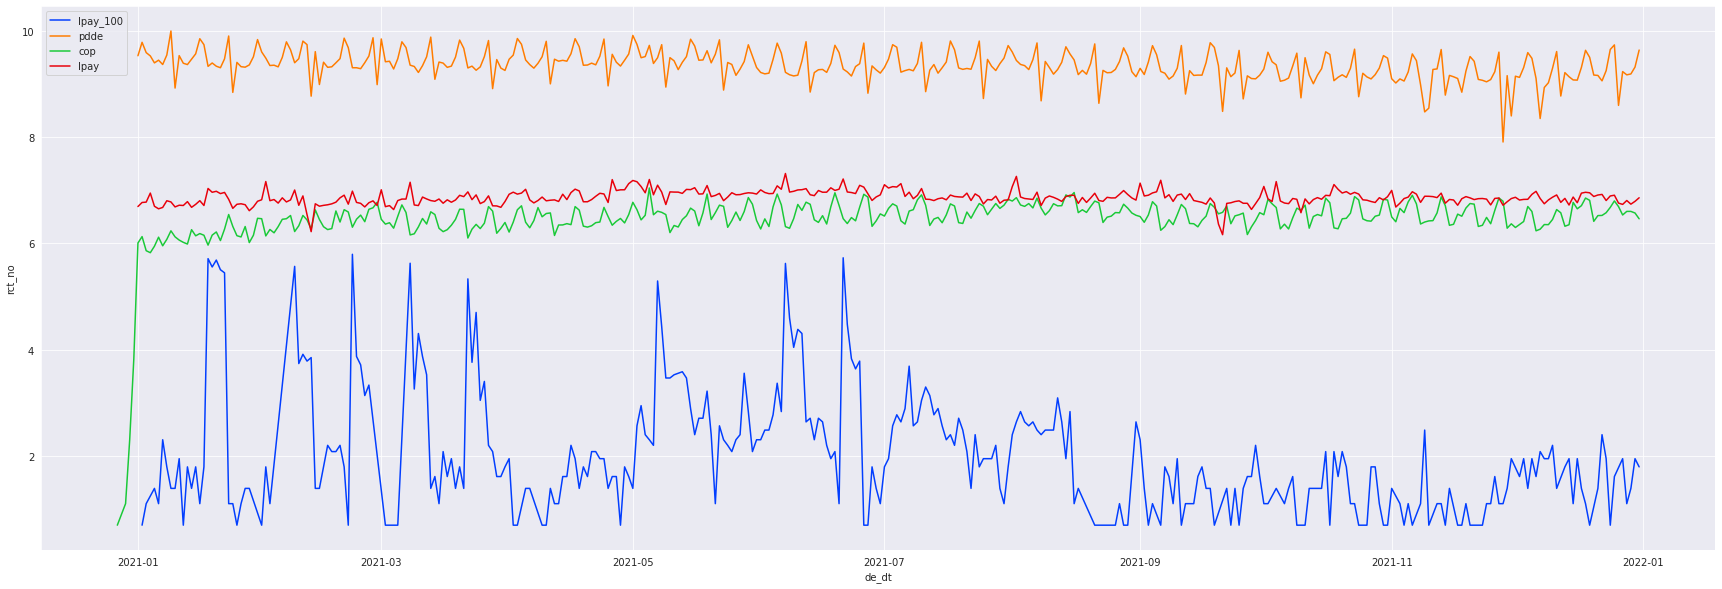

In [ ]:
temp1=lpay_100.groupby(['de_dt']).rct_no.count().reset_index()
temp2=pdde.groupby(['de_dt']).rct_no.count().reset_index()
temp3=cop.groupby(['de_dt']).rct_no.count().reset_index()
temp4=lpay.groupby(['de_dt']).rct_no.count().reset_index()


temp1['rct_no']=temp1['rct_no'].apply(np.log1p)
temp2['rct_no']=temp2['rct_no'].apply(np.log1p)
temp3['rct_no']=temp3['rct_no'].apply(np.log1p)
temp4['rct_no']=temp4['rct_no'].apply(np.log1p)

fig, axs = plt.subplots(figsize = (30, 10))
sns.lineplot(data = temp1, x ='de_dt', y='rct_no', label='lpay_100')
sns.lineplot(data = temp2, x ='de_dt', y='rct_no', label='pdde')
sns.lineplot(data = temp3, x ='de_dt', y='rct_no', label='cop')
sns.lineplot(data = temp4, x ='de_dt', y='rct_no', label='lpay')
axs.legend()

#### 100원 결제 이후

- 거래 유무

In [ ]:
# 첫 구매가 100원 고객 리스트
lpay_demo.sort_values('de_dt',inplace=True)
lpay_demo.reset_index(drop=True,inplace=True)
temp1=lpay_demo.drop_duplicates(['cust'],keep='first')
first_100=temp1.loc[temp1.buy_am==100].cust.unique().tolist()

# 첫 구매가 100원인 고객의 이후 엘페이 이용 거래
temp2=lpay_demo.loc[lpay_demo['cust'].isin(first_100)]
after_100_rct=temp2.groupby(['cust'])['rct_no'].count().sort_values().reset_index()
after_100_buy_am=temp2.groupby(['cust'])['buy_am'].sum().sort_values().reset_index()

print(f'첫 구매 100원 고객 수 : {len(first_100)}')
print(f'첫 100원 거래 이후 구매 있는 고객 수 :{len(after_100_rct.loc[after_100_rct.rct_no!=1])}')
print(f'첫 100원 거래 이후 구매 없는 고객 수 :{len(after_100_rct.loc[after_100_rct.rct_no==1])}')

첫 구매 100원 고객 수 : 353
첫 100원 거래 이후 구매 있는 고객 수 :317
첫 100원 거래 이후 구매 없는 고객 수 :36


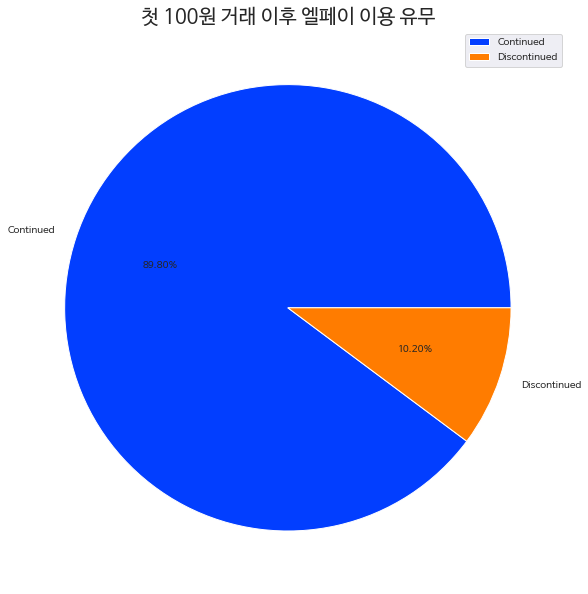

In [ ]:
cnt = [len(after_100_rct.loc[after_100_rct.rct_no!=1]), len(after_100_rct.loc[after_100_rct.rct_no==1])]
labels= ["Continued", "Discontinued"]
fig, axs = plt.subplots(figsize = (10, 15))
axs.set_title("첫 100원 거래 이후 엘페이 이용 유무",fontsize=20)
axs.pie(x = cnt, labels = labels, autopct = '%.2f%%')
axs.legend()

- 거래 금액 비교

In [ ]:
lpay_median=np.quantile(lpay.groupby(['cust']).buy_am.sum(),0.5)
print(f'엘페이 고객 결제금액 중앙값: {lpay_median}')
print(f'첫 100원 거래 이후 결제금액 중앙값 이상 소비 고객 수 :{after_100_buy_am.loc[after_100_buy_am.buy_am>=lpay_median].cust.nunique()}')
print(f'첫 100원 거래 이후 결제금액 중앙값 미만 소비 고객 수 :{after_100_buy_am.loc[after_100_buy_am.buy_am<lpay_median].cust.nunique()}')

엘페이 고객 결제금액 중앙값: 805011.0
첫 100원 거래 이후 결제금액 중앙값 이상 소비 고객 수 :87
첫 100원 거래 이후 결제금액 중앙값 미만 소비 고객 수 :266


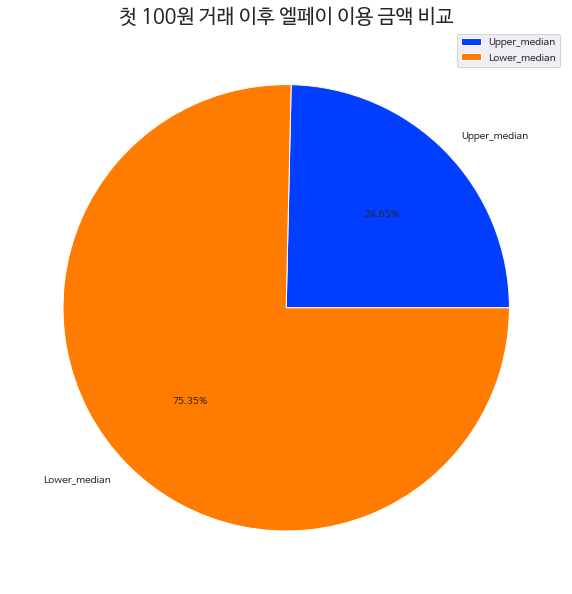

In [ ]:
cnt = [after_100_buy_am.loc[after_100_buy_am.buy_am>=lpay_median].cust.nunique(), after_100_buy_am.loc[after_100_buy_am.buy_am<lpay_median].cust.nunique()]
labels= ["Upper_median", "Lower_median"]
fig, axs = plt.subplots(figsize = (10, 15))
axs.set_title("첫 100원 거래 이후 엘페이 이용 금액 비교" ,fontsize=20)
axs.pie(x = cnt, labels = labels, autopct = '%.2f%%')
axs.legend()

### 2) Retention

In [ ]:
#rct_no 구매 날짜 데이터프레임 생성
df_order_time_lpay=lpay.groupby(['cust','rct_no','de_dt']).buy_am.sum().reset_index()
df_order_time_lpay.drop(['buy_am'], axis=1, inplace=True)

#order month
df_order_time_lpay['order_month']=df_order_time_lpay['de_dt'].dt.strftime('%Y-%m')

#first_order 열 입력
df_order_time_lpay.set_index('cust',inplace=True)
first_order=df_order_time_lpay.groupby(df_order_time_lpay.index)['de_dt'].min()
first_order=first_order.dt.strftime('%Y-%m') #order_month 형식

df_order_time_lpay['first_order']=first_order
df_order_time_lpay.reset_index(inplace=True)

#first_order 기준 고객 리스트
cohorts_cust_lpay=df_order_time_lpay.groupby(['first_order','order_month']).cust.apply(set).reset_index()
cohorts_cust_lpay['total_users']=cohorts_cust_lpay['cust'].apply(len)
cohorts_cust_lpay['cust']=cohorts_cust_lpay['cust'].apply(list)
cohorts_cust_lpay.head()

,first_order,order_month,cust,total_users
0,2021-01,2021-01,"[M204843023, M398077427, M014008347, M32865160...",4902
1,2021-01,2021-02,"[M204843023, M398077427, M014008347, M32865160...",3901
2,2021-01,2021-03,"[M204843023, M398077427, M014008347, M97597047...",3858
3,2021-01,2021-04,"[M204843023, M398077427, M014008347, M32865160...",3809
4,2021-01,2021-05,"[M204843023, M398077427, M014008347, M97597047...",3819


In [ ]:
#first_order,order_month,total_users 사용
cohorts_lpay=cohorts_cust_lpay.loc[:,['first_order','order_month','total_users']]

#데이터 없는 달 확인 -> 없음
each_period=cohorts_lpay['first_order'].value_counts().sort_index()

#cohort_period 입력
cohort_period=[]

for i in each_period:
  for j in range(i):
    cohort_period.append(j)

cohorts_lpay['cohort_period']=cohort_period

#index 설정 및 unstack
cohorts_lpay.set_index(['first_order','cohort_period'],inplace=True)
cohorts_lpay=cohorts_lpay['total_users'].unstack(1)

#비율로 보기
user_retention_lpay=cohorts_lpay.divide(cohorts_lpay[0],axis=0)
user_retention_lpay

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2021-01,1.0,0.795798,0.787026,0.777030,0.779070,0.764586,0.729498,0.702570,0.682579,0.682375,0.660547,0.653611
2021-02,1.0,0.535300,0.542677,0.544784,0.527924,0.474183,0.477345,0.426765,0.462592,0.430980,0.421496,NaN
2021-03,1.0,0.486804,0.483871,0.480938,0.420821,0.406158,0.392962,0.395894,0.407625,0.401760,NaN,NaN
2021-04,1.0,0.523102,0.425743,0.440594,0.371287,0.339934,0.356436,0.328383,0.341584,NaN,NaN,NaN
2021-05,1.0,0.432990,0.397938,0.360825,0.348454,0.336082,0.327835,0.323711,NaN,NaN,NaN,NaN
2021-06,1.0,0.421222,0.376206,0.318328,0.350482,0.401929,0.372990,NaN,NaN,NaN,NaN,NaN
2021-07,1.0,0.460317,0.357143,0.373016,0.373016,0.337302,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,1.0,0.381356,0.355932,0.334746,0.322034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,1.0,0.391304,0.369565,0.318841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Retention curve

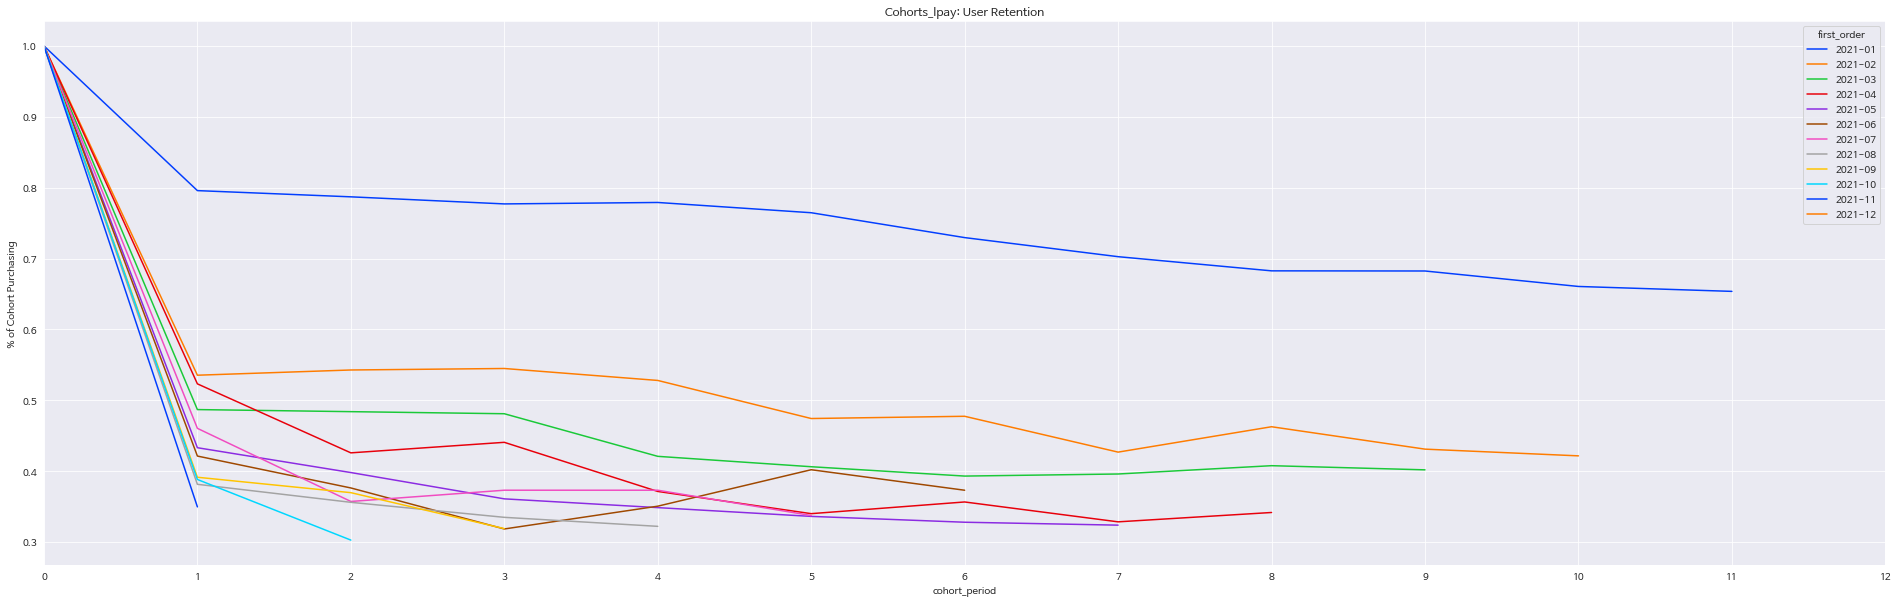

In [ ]:
user_retention_lpay.T[['2021-01','2021-02','2021-03','2021-04','2021-05','2021-06', '2021-07', '2021-08','2021-09','2021-10','2021-11','2021-12']].plot(figsize=(33,10))
plt.title('Cohorts_lpay: User Retention')
plt.xticks(np.arange(0, 12.1, 1))
plt.xlim(0, 12)
plt.ylabel('% of Cohort Purchasing');
plt.show()

#### Retention heatmap

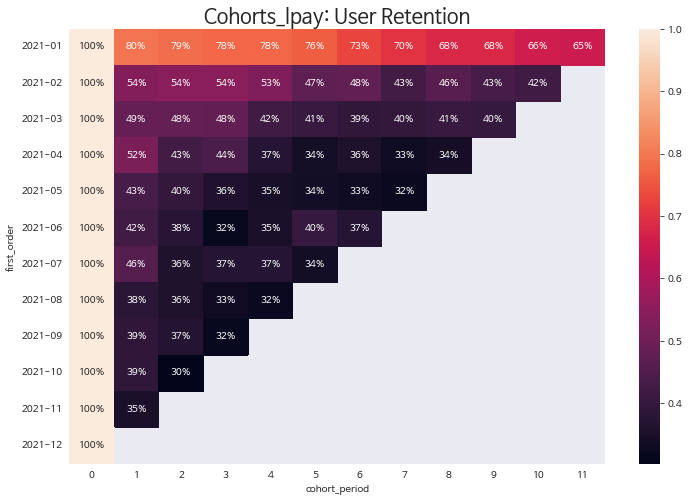

In [ ]:
fig, axs = plt.subplots(figsize = (12, 8))
axs.set_title('Cohorts_lpay: User Retention', fontsize=20)
sns.heatmap(user_retention_lpay, annot=True, fmt='.0%')